# Medical Insurance Cost Prediction using Machine Learning with Python 

# Importing the Dependences

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

import pandas as pd: This imports the pandas library, which provides data manipulation and analysis tools. It is commonly used to work with structured data in tabular form.

import numpy as np: This imports the numpy library, which provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. It is widely used in scientific computing and data analysis.

import matplotlib.pyplot as plt: This imports the pyplot module from the matplotlib library, which provides a MATLAB-like interface for creating plots and visualizations. It is commonly used for data visualization tasks.

import seaborn as sns: This imports the seaborn library, which is built on top of Matplotlib and provides a high-level interface for creating informative and aesthetically pleasing statistical graphics. It is often used for creating more advanced visualizations and statistical plots.

from sklearn.model_selection import train_test_split: This imports the train_test_split function from the model_selection module of scikit-learn (sklearn). It is used to split the dataset into training and testing subsets, which is essential for evaluating the performance of machine learning models.

from sklearn.linear_model import LinearRegression: This imports the LinearRegression class from the linear_model module of scikit-learn. It is used to perform linear regression, a commonly used supervised learning algorithm for predicting continuous target variables based on one or more input features.

from sklearn import metrics: This imports the metrics module from scikit-learn. It provides various evaluation metrics to assess the performance of machine learning models, such as mean squared error (MSE), mean absolute error (MAE), etc.

Mean Squared Error (MSE) is a metric used to measure the average squared difference between the predicted and actual values, providing an indication of the model's prediction accuracy. It is calculated by taking the average of the squared residuals (the differences between predicted and actual values).

Mean Absolute Error (MAE) is a metric used to measure the average absolute difference between the predicted and actual values, providing an indication of the model's prediction accuracy. It is calculated by taking the average of the absolute residuals (the absolute differences between predicted and actual values).

import warnings: This imports the warnings module, which provides a way to handle warning messages generated during the execution of Python code.

warnings.filterwarnings("ignore"): This line of code sets the filterwarnings function to ignore warnings, which means that warning messages will not be displayed during the code execution. It can be useful to suppress warnings that do not affect the functionality of the code.

# Data Collection & Analysis

In [88]:
# Load the dataset
data_path = 'insurance.csv'
insurance_data = pd.read_csv(data_path)

#print the first five rows
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
# number of rows in the columns
insurance_data.shape

(1338, 7)

In [90]:
# Display information about the insurance_data dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
# Checking for missing values
missing_values = insurance_data.isnull().sum()
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

insurance_data.isnull() checks for null values in each element of the dataset.
.sum() calculates the sum of null values for each column, resulting in the total count of missing values per column.

In [92]:
# Statistical summary
stat_summary = insurance_data.describe()
stat_summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Distribution of age values

<Figure size 600x600 with 0 Axes>

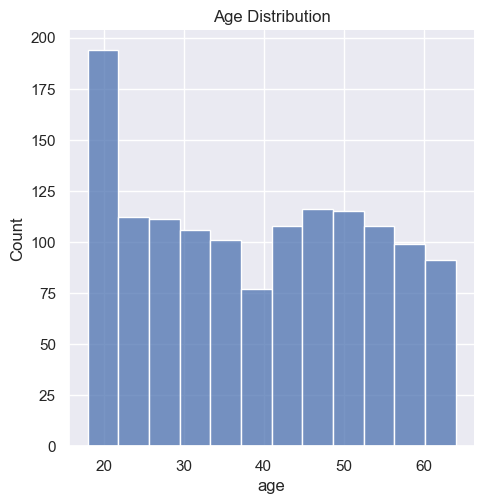

In [93]:
#Distribution of age values
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

The code provided below is using the seaborn (sns) and matplotlib (plt) libraries to plot a histogram of the 'age' column from the 'insurance_data' DataFrame. It sets the figure size, creates the histogram using sns.displot(), sets the title of the plot to 'Age Distribution', and displays the plot using plt.show().

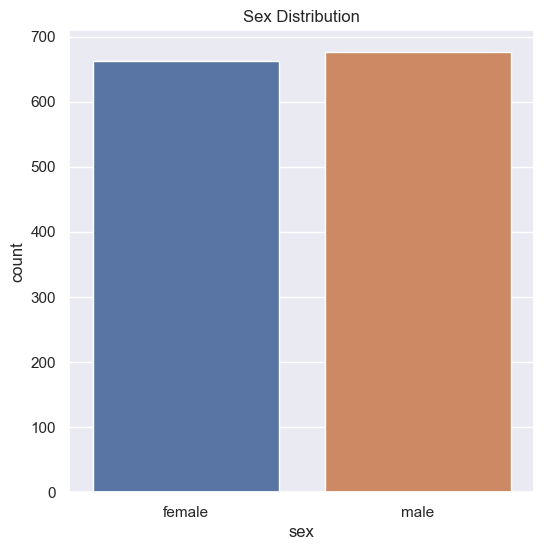

In [94]:
# Gender column

plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = insurance_data)
plt.title('Sex Distribution')
plt.show()

plt.figure(figsize=(6, 6)): This line sets the figure size of the plot to 6 inches by 6 inches, defining the dimensions of the output plot.
sns.countplot(x='sex', data=insurance_data): This line creates a countplot using seaborn (sns) library, where the 'sex' column of the insurance_data dataset is plotted on the x-axis. The countplot displays the number of occurrences of each gender category.
plt.title('Sex Distribution'): This line adds a title to the plot, labeling it as 'Sex Distribution'.
plt.show(): This line displays the plot on the screen.

In [95]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

insurance_data['sex']: This accesses the 'sex' column of the insurance_data dataset.
.value_counts(): This method calculates the number of occurrences of each unique value in the 'sex' column and returns the counts in descending order.

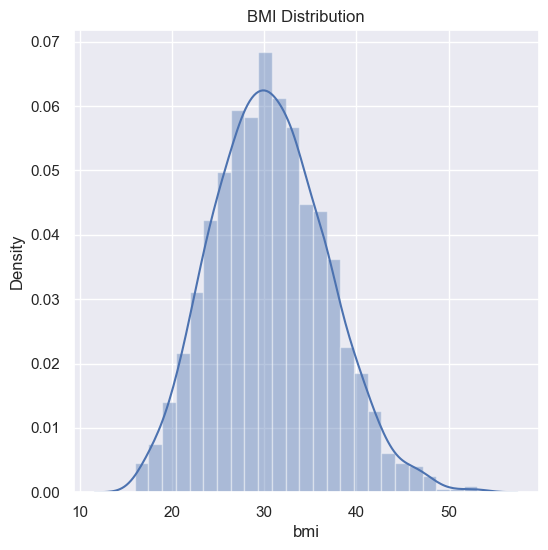

In [96]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

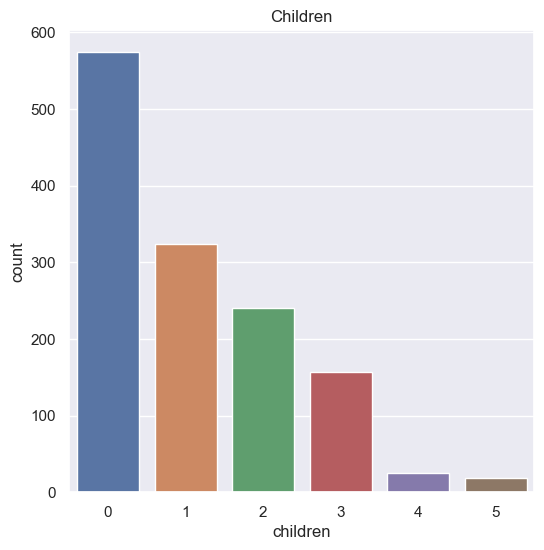

In [97]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children')
plt.show()

plt.figure(figsize=(6, 6)): This line sets the figure size of the plot to 6 inches by 6 inches, defining the dimensions of the output plot.
sns.countplot(x='children', data=insurance_data): This line creates a countplot using seaborn (sns) library, where the 'children' column of the insurance_data dataset is plotted on the x-axis. The countplot displays the number of occurrences for each unique value in the 'children' column.
plt.title('Children'): This line adds a title to the plot, labeling it as 'Children'.
plt.show(): This line displays the plot on the screen.

In [98]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

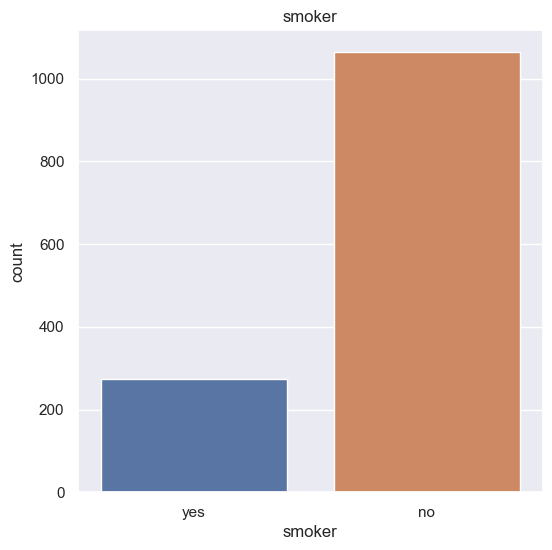

In [99]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('smoker')
plt.show()

In [100]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

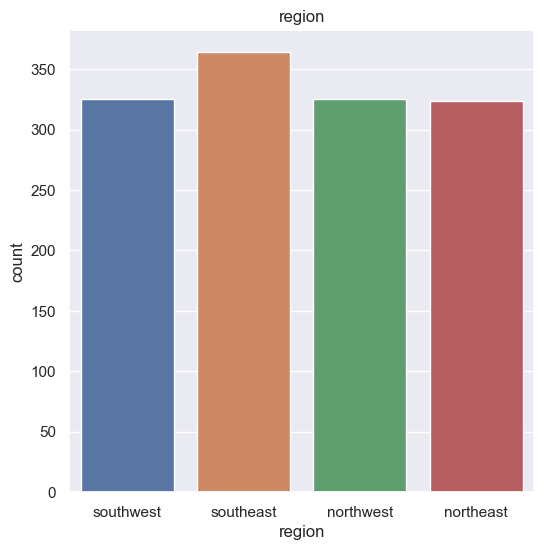

In [101]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('region')
plt.show()

In [102]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

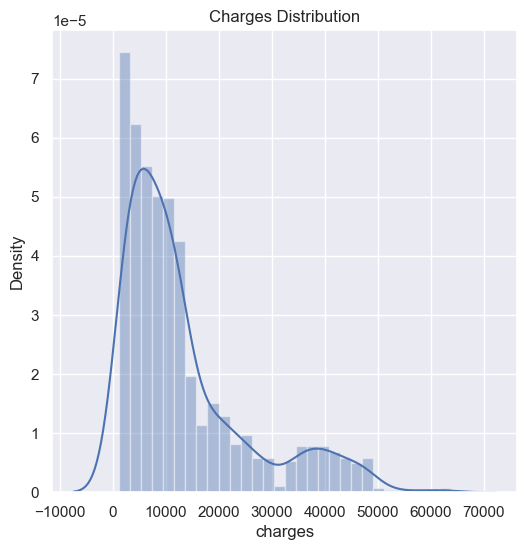

In [103]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

plt.figure(figsize=(6, 6)): This line sets the figure size of the plot to 6 inches by 6 inches, defining the dimensions of the output plot.
sns.distplot(insurance_data['charges']): This line creates a distribution plot using seaborn (sns) library, specifically the distplot function. It takes the 'charges' column of the insurance_data dataset as input and plots the distribution of values.
plt.title('Charges Distribution'): This line adds a title to the plot, labeling it as 'Charges Distribution'.
plt.show(): This line displays the plot on the screen.

# Data Pre-Processing

# Encoding the categorical features

In [104]:
# encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True): This line replaces the values in the 'sex' column of the insurance_data dataset. It replaces 'male' with 0 and 'female' with 1, effectively encoding the gender information as numeric values.

insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True): This line replaces the values in the 'smoker' column of the insurance_data dataset. It replaces 'yes' with 0 and 'no' with 1, encoding the smoker information as numeric values.

insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True): This line replaces the values in the 'region' column of the insurance_data dataset. It replaces 'southeast' with 0, 'southwest' with 1, 'northeast' with 2, and 'northwest' with 3, encoding the region information as numeric values.

# Splitting the Features and Target

In [105]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

The provided code assigns the feature matrix (X) and the target variable (Y) for a predictive modeling task using the insurance_data dataset.

X = insurance_data.drop(columns='charges', axis=1): This line creates the feature matrix (X) by dropping the 'charges' column from the insurance_data dataset using the drop function. The columns='charges' parameter specifies the column to be dropped, and axis=1 indicates that the operation should be performed along the columns axis.

Y = insurance_data['charges']: This line assigns the 'charges' column of the insurance_data dataset to the target variable (Y). It extracts the values of the 'charges' column and assigns it to the variable Y.

In [106]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [107]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

The provided code splits the feature matrix (X) and the target variable (Y) into training and testing sets using the train_test_split function.

Here's a brief explanation of the code:

train_test_split(X, Y, test_size=0.2, random_state=2): This line splits the feature matrix (X) and the target variable (Y) into training and testing sets. The test_size=0.2 parameter specifies that 20% of the data should be used for testing, while the remaining 80% will be used for training. The random_state=2 parameter sets a random seed value of 2, ensuring reproducibility of the train-test split.

X_train, X_test, Y_train, Y_test: This line assigns the split data to four separate variables. X_train and Y_train will contain the training data for the feature matrix and target variable, respectively, while X_test and Y_test will contain the testing data for the feature matrix and target variable, respectively.

After executing this code, you will have X_train and Y_train containing the training data, and X_test and Y_test containing the testing data. These splits are commonly used in machine learning to evaluate the performance of a model on unseen data.

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

# Linear Regression

In [110]:
# loading the Linear Regression model
regressor = LinearRegression()

The code regressor = LinearRegression() creates an instance of the LinearRegression class and assigns it to the variable regressor. This is typically done when building a linear regression model for prediction or analysis.

The LinearRegression() function is part of the scikit-learn library (sklearn) and represents a linear regression estimator. It is used to fit a linear regression model to the training data and make predictions based on the learned coefficients.

In [111]:
regressor.fit(X_train, Y_train)

LinearRegression()

The code regressor.fit(X_train, Y_train) trains the linear regression model (regressor) using the training data (X_train and Y_train).

Here's a brief explanation of the code:

regressor: This is the instance of the LinearRegression class that was created earlier.

.fit(X_train, Y_train): This method fits the linear regression model to the training data. It takes the feature matrix X_train and the target variable Y_train as input. The model will learn the coefficients and intercept based on the provided training data.

By executing this code, the linear regression model will be trained using the features in X_train and the corresponding target values in Y_train. The model will adjust its parameters to find the best fit line that minimizes the difference between the predicted values and the actual target values.

# Model Evaluation

In [112]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

The code training_data_prediction = regressor.predict(X_train) generates predictions for the training data using the trained linear regression model (regressor).

In [115]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


The code r2_train = metrics.r2_score(Y_train, training_data_prediction) calculates the coefficient of determination (R-squared) for the training data predictions made by the linear regression model.

Here's a brief explanation of the code:

metrics.r2_score(Y_train, training_data_prediction): This function from the scikit-learn library (sklearn) calculates the R-squared value. It takes the actual target values (Y_train) and the predicted values for the training data (training_data_prediction) as inputs and returns the R-squared score.

r2_train: This variable stores the R-squared score calculated for the training data.

print('R squared value : ', r2_train): This line prints the R-squared value for the training data.

The R-squared (coefficient of determination) value is a statistical measure that represents the proportion of the variance in the dependent variable (target variable) that can be explained by the independent variables (features) in a regression model. It is used to assess the goodness of fit of the model.

# Building a Predictive System

In [114]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496046


The provided code demonstrates how to use a trained linear regression model (regressor) to make predictions on new input data.

Here's a breakdown of the code:

input_data = (31, 1, 25.74, 0, 1, 0): This line defines the input data as a tuple. It represents the values for the features (age, sex, BMI, smoker, region) for which you want to predict the insurance cost.

input_data_as_numpy_array = np.asarray(input_data): This line converts the input data tuple into a NumPy array, which is a common data structure used in numerical operations and machine learning.

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1): This line reshapes the input data array to have a shape of (1, n), where n is the number of features. It is necessary to reshape the input data when making predictions with scikit-learn models.

prediction = regressor.predict(input_data_reshaped): This line uses the trained linear regression model (regressor) to predict the insurance cost for the input data. The predict method takes the reshaped input data (input_data_reshaped) and returns the predicted value.

print(prediction): This line prints the predicted insurance cost.

print('The insurance cost is USD', prediction[0]): This line prints the predicted insurance cost in a formatted string.